In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
babs = pd.read_csv('data/201508_trip_data.csv.gz')

In [4]:
babs.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [5]:
def convert_date(date_str):
    return datetime.datetime.strptime(date_str, '%m/%d/%Y %H:%M')

In [6]:
babs['Start Date'] = babs['Start Date'].apply(convert_date)

In [7]:
babs.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [14]:
hourly = (babs
          .groupby('Start Date')
          .size() # need the counts
          .resample('1h')
          .sum()
          .fillna(0))

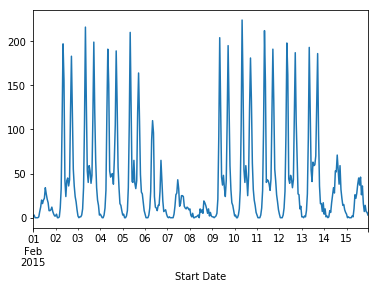

In [18]:
hourly['2015-02-01':'2015-02-15'].plot()

In [15]:
hourly.head()

Start Date
2014-09-01 00:00:00    3.0
2014-09-01 01:00:00    0.0
2014-09-01 02:00:00    0.0
2014-09-01 03:00:00    1.0
2014-09-01 04:00:00    2.0
Freq: H, dtype: float64

(0, 336)

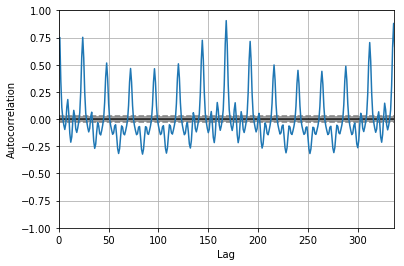

In [16]:
pd.plotting.autocorrelation_plot(hourly)
plt.xlim(0, 24*14)

# Direct Component Modeling

In [20]:
hourly.head()

Start Date
2014-09-01 00:00:00    3.0
2014-09-01 01:00:00    0.0
2014-09-01 02:00:00    0.0
2014-09-01 03:00:00    1.0
2014-09-01 04:00:00    2.0
Freq: H, dtype: float64

In [23]:
hourly.index.weekday_name

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday'],
      dtype='object', name='Start Date', length=8760)

In [29]:
comp = pd.get_dummies(hourly.index.weekday_name, drop_first=True)
comp.index = hourly.index

In [31]:
comp.head(5)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Start Date,,,,,,
2014-09-01 00:00:00,1,0,0,0,0,0
2014-09-01 01:00:00,1,0,0,0,0,0
2014-09-01 02:00:00,1,0,0,0,0,0
2014-09-01 03:00:00,1,0,0,0,0,0
2014-09-01 04:00:00,1,0,0,0,0,0


In [32]:
comp['hour'] = hourly.index.hour

In [34]:
comp['count'] = hourly

In [35]:
comp

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hour,count
Start Date,,,,,,,,
2014-09-01 00:00:00,1,0,0,0,0,0,0,3.0
2014-09-01 01:00:00,1,0,0,0,0,0,1,0.0
2014-09-01 02:00:00,1,0,0,0,0,0,2,0.0
2014-09-01 03:00:00,1,0,0,0,0,0,3,1.0
2014-09-01 04:00:00,1,0,0,0,0,0,4,2.0
2014-09-01 05:00:00,1,0,0,0,0,0,5,1.0
2014-09-01 06:00:00,1,0,0,0,0,0,6,1.0
2014-09-01 07:00:00,1,0,0,0,0,0,7,4.0
2014-09-01 08:00:00,1,0,0,0,0,0,8,13.0


In [36]:
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
hourly.index.min(), hourly.index.max()

(Timestamp('2014-09-01 00:00:00', freq='H'),
 Timestamp('2015-08-31 23:00:00', freq='H'))

In [38]:
split_point = '2015-08-21'

In [43]:
train, test = comp[:split_point], comp['2015-08-22':]

In [44]:
train.index.min(), train.index.max()

(Timestamp('2014-09-01 00:00:00', freq='H'),
 Timestamp('2015-08-21 23:00:00', freq='H'))

In [45]:
test.index.min(), test.index.max()

(Timestamp('2015-08-22 00:00:00', freq='H'),
 Timestamp('2015-08-31 23:00:00', freq='H'))

In [48]:
var = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday', 'hour']

In [49]:
model = ExtraTreesRegressor().fit(train[var], train['count'])

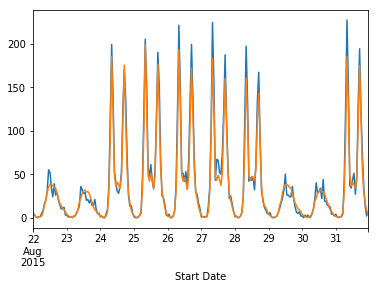

In [54]:
test['count'].plot()
pd.Series(model.predict(test[var]), index=test.index).plot()

# AR model

In [55]:
shifts = {'1h': 1, '1d': 24, '1w': 24*7, '28d': 24*28}

In [58]:
hourly.head()

Start Date
2014-09-01 00:00:00    3.0
2014-09-01 01:00:00    0.0
2014-09-01 02:00:00    0.0
2014-09-01 03:00:00    1.0
2014-09-01 04:00:00    2.0
Freq: H, dtype: float64

In [56]:
hourly.shift(1).head()

Start Date
2014-09-01 00:00:00    NaN
2014-09-01 01:00:00    3.0
2014-09-01 02:00:00    0.0
2014-09-01 03:00:00    0.0
2014-09-01 04:00:00    1.0
Freq: H, dtype: float64

In [60]:
pd.DataFrame({'a': [1,2,3], 'b': [3,4,5]})

,a,b
0,1,3
1,2,4
2,3,5


In [61]:
data = pd.DataFrame({k: hourly.shift(shifts[k]) for k in shifts})

In [62]:
data['curr'] = hourly

In [64]:
data = data.dropna()

In [65]:
data.head()

,1d,1h,1w,28d,curr
Start Date,,,,,
2014-09-29 00:00:00,7.0,1.0,2.0,3.0,1.0
2014-09-29 01:00:00,4.0,1.0,4.0,0.0,0.0
2014-09-29 02:00:00,4.0,0.0,0.0,0.0,0.0
2014-09-29 03:00:00,1.0,0.0,1.0,1.0,1.0
2014-09-29 04:00:00,1.0,1.0,1.0,2.0,3.0


In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
train, test = data[:'2015-08-21'], data['2015-08-22':]

In [68]:
var = list(shifts.keys())

In [69]:
var

['1h', '1d', '1w', '28d']

In [70]:
model = RandomForestRegressor().fit(train[var], train['curr'])

In [71]:
pred = pd.Series(model.predict(test[var]), index=test.index)

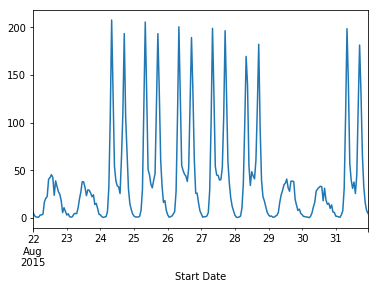

In [72]:
pred.plot()

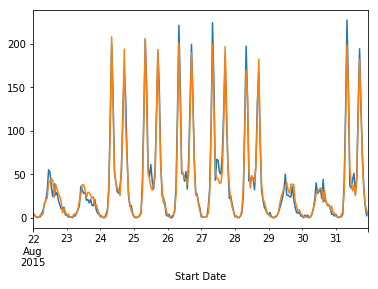

In [74]:
test['curr'].plot()
pred.plot()